#Decision Tree Classification
#Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Importing the dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/NetzwerkPriyanka8/ML_April/main/Projects/Decision_Tree/Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
#describing dataset with all functions
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#Checking for missing values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No any particular missing values

<Figure size 432x432 with 0 Axes>

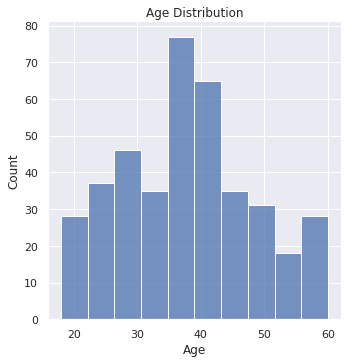

In [ ]:
#Age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['Age'])
plt.title('Age Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

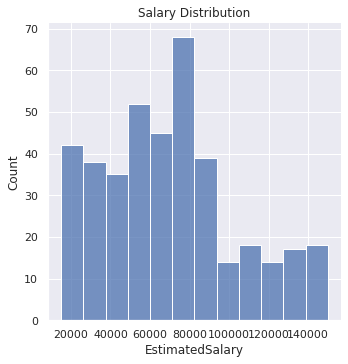

In [ ]:
#Salary Distribution
plt.figure(figsize=(6,6))
sns.displot(dataset['EstimatedSalary'])
plt.title('Salary Distribution')
plt.show()

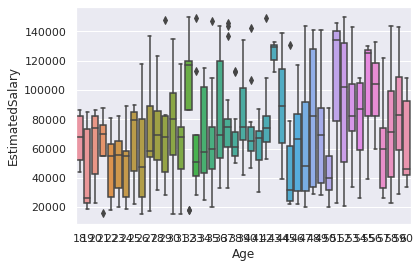

In [ ]:
#box plot
sns.boxplot(x='Age', y='EstimatedSalary', data=dataset)

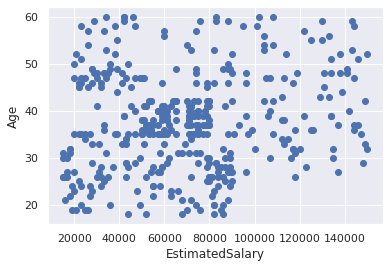

In [ ]:
#Scatter plot
plt.scatter(dataset['EstimatedSalary'],dataset['Age'])
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.show()

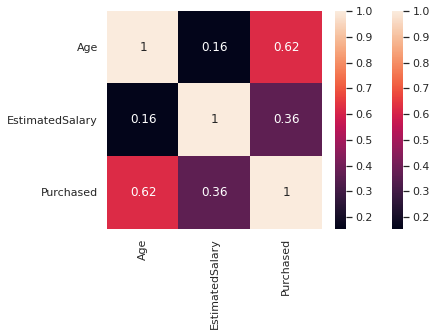

In [ ]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True)
sns.heatmap(correlation_matrix, )
plt.show()

#Initiating variables

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training the model using decision tree algorithm on training dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Testing the model

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

#Performance Checking for accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[61  7]
 [ 3 29]]


90.0

we are getting 90% accuracy.

#Predicting for new result

In [ ]:

output = classifier.predict(sc.transform([[87, 60000]]))
output

array([1])

In [ ]:
output = classifier.predict(sc.transform([[60, 250000]]))
output

array([1])

In [ ]:
output = classifier.predict(sc.transform([[37, 20000]]))
output

array([0])